# 정기권/일일권에 따른 따릉이 수요분석 (2018-2019)

In [1]:
import pickle

In [2]:
with open('./dataset/따릉이_대여이력_2018v2.pkl','rb') as f:
    df2018=pickle.load(f)
    
with open('./dataset/따릉이_대여이력_2019v2.pkl','rb') as f:
    df2019=pickle.load(f)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family']='Hancom Gothic'

In [4]:
df2018.head()

,rent_id,rent_time,return_id,return_time,travel_time,travel_distance,fare,sex,age
0,227,2018-01-01 00:00:10,227,2018-01-01 00:04:03,233.0,50.0,BIL_006,F,AGE_002
1,2248,2018-01-01 00:02:15,2250,2018-01-01 00:05:48,213.0,950.0,BIL_002,F,AGE_003
2,361,2018-01-01 00:01:03,383,2018-01-01 00:06:18,315.0,850.0,BIL_002,M,AGE_003
3,1125,2018-01-01 00:02:09,1124,2018-01-01 00:06:45,276.0,630.0,BIL_004,M,AGE_002
4,567,2018-01-01 00:00:58,3506,2018-01-01 00:09:33,515.0,1390.0,BIL_002,M,AGE_004


In [5]:
df2018.shape

(10080848, 9)

In [6]:
df2019.head()

,rent_id,rent_time,return_id,return_time,travel_time,travel_distance,fare,sex,age
0,1421,2019-01-01 00:00:44,1420,2019-01-01 00:03:53,189.0,580.0,BIL_004,\N,AGE_002
1,1408,2019-01-01 00:02:16,1433,2019-01-01 00:07:07,291.0,1020.0,BIL_002,F,AGE_005
2,347,2019-01-01 00:04:12,387,2019-01-01 00:07:07,175.0,550.0,BIL_014,M,AGE_003
3,615,2019-01-01 00:03:09,612,2019-01-01 00:07:27,258.0,700.0,BIL_002,\N,AGE_002
4,1177,2019-01-01 00:01:44,1152,2019-01-01 00:08:09,385.0,1090.0,BIL_006,\N,AGE_002


In [7]:
df2019.shape

(18971319, 9)

In [8]:
bike=pd.concat([df2018,df2019], ignore_index=True)

In [9]:
bike.shape

(29052167, 9)

In [10]:
fare_list=bike['fare'].unique()

In [11]:
fare_list.sort()
fare_list

array(['BIL_001', 'BIL_002', 'BIL_004', 'BIL_005', 'BIL_006', 'BIL_006 ',
       'BIL_007', 'BIL_008', 'BIL_011', 'BIL_012', 'BIL_014', 'BIL_015',
       'BIL_016', 'BIL_017', 'BIL_020', 'RCC_001', 'RCC_002', 'RCC_004',
       '\\N'], dtype=object)

### 정기권/일일권 타입

정기권 - 001,002,004,005,011,012,014,015

일일권 - 006,007,016,017

In [12]:
bike.head()

,rent_id,rent_time,return_id,return_time,travel_time,travel_distance,fare,sex,age
0,227,2018-01-01 00:00:10,227,2018-01-01 00:04:03,233.0,50.0,BIL_006,F,AGE_002
1,2248,2018-01-01 00:02:15,2250,2018-01-01 00:05:48,213.0,950.0,BIL_002,F,AGE_003
2,361,2018-01-01 00:01:03,383,2018-01-01 00:06:18,315.0,850.0,BIL_002,M,AGE_003
3,1125,2018-01-01 00:02:09,1124,2018-01-01 00:06:45,276.0,630.0,BIL_004,M,AGE_002
4,567,2018-01-01 00:00:58,3506,2018-01-01 00:09:33,515.0,1390.0,BIL_002,M,AGE_004


In [13]:
bike.tail()

,rent_id,rent_time,return_id,return_time,travel_time,travel_distance,fare,sex,age
29052162,430,2019-12-31 23:38:14,430,2020-01-01 01:58:18,8404.0,3770.0,BIL_015,M,AGE_006
29052163,1673,2019-12-31 16:08:16,1636,2020-01-01 02:32:10,37434.0,620.0,BIL_005,F,AGE_002
29052164,2307,2019-12-31 21:11:33,3534,2020-01-01 02:47:59,20186.0,3820.0,BIL_006,F,AGE_002
29052165,327,2019-12-31 23:59:58,327,2020-01-01 03:02:20,10942.0,11890.0,BIL_006,M,AGE_002
29052166,500,2019-12-31 20:11:43,3542,2020-01-01 11:00:47,53344.0,1510.0,BIL_004,M,AGE_003


In [14]:
bike[bike['fare']=='BIL_006 '].count()

rent_id            2
rent_time          2
return_id          2
return_time        2
travel_time        2
travel_distance    2
fare               2
sex                2
age                2
dtype: int64

In [128]:
# 오타 조정

bike['fare']=bike['fare'].apply(lambda x:x.replace('BIL_006 ','BIL_006'))

In [16]:
bike[bike['fare']=='BIL_006 '].count()

rent_id            0
rent_time          0
return_id          0
return_time        0
travel_time        0
travel_distance    0
fare               0
sex                0
age                0
dtype: int64

#### 정기권/일일권/기타 분류

In [17]:
regular=['BIL_001','BIL_002','BIL_004','BIL_005','BIL_011','BIL_012','BIL_014','BIL_015']
daily=['BIL_006','BIL_007','BIL_016','BIL_017']
others=['BIL_008', '\\N', 'BIL_020', 'RCC_001', 'RCC_004','RCC_002']

In [18]:
bike['type']=bike['fare'].replace(regular,'Regular').replace(daily,'Daily').replace(others,'Others')

#### 연/월/일/요일 분류

In [19]:
bike['year']=bike['rent_time'].dt.year
bike['month']=bike['rent_time'].dt.month
bike['day']=bike['rent_time'].dt.day
bike['dayofweek']=bike['rent_time'].dt.dayofweek

In [20]:
weeks={0:'Mon',
      1:'Tue',
      2:'Wed',
      3:'Thu',
      4:'Fri',
      5:'Sat',
      6:'Sun'}

bike['dayofweek']=bike['dayofweek'].map(weeks)

In [21]:
bike.head()

,rent_id,rent_time,return_id,return_time,travel_time,travel_distance,fare,sex,age,type,year,month,day,dayofweek
0,227,2018-01-01 00:00:10,227,2018-01-01 00:04:03,233.0,50.0,BIL_006,F,AGE_002,Daily,2018,1,1,Mon
1,2248,2018-01-01 00:02:15,2250,2018-01-01 00:05:48,213.0,950.0,BIL_002,F,AGE_003,Regular,2018,1,1,Mon
2,361,2018-01-01 00:01:03,383,2018-01-01 00:06:18,315.0,850.0,BIL_002,M,AGE_003,Regular,2018,1,1,Mon
3,1125,2018-01-01 00:02:09,1124,2018-01-01 00:06:45,276.0,630.0,BIL_004,M,AGE_002,Regular,2018,1,1,Mon
4,567,2018-01-01 00:00:58,3506,2018-01-01 00:09:33,515.0,1390.0,BIL_002,M,AGE_004,Regular,2018,1,1,Mon


#### Travel_time 이 0이하인 경우 삭제

In [22]:
bike[bike['travel_time']<=0].count()

rent_id            147
rent_time          147
return_id          147
return_time        147
travel_time        147
travel_distance    147
fare               147
sex                146
age                147
type               147
year               147
month              147
day                147
dayofweek          147
dtype: int64

In [23]:
bike=bike.drop(bike[bike['travel_time']<=0].index).reset_index(drop=True)
bike.shape

(29052020, 14)

In [24]:
bike.head()

,rent_id,rent_time,return_id,return_time,travel_time,travel_distance,fare,sex,age,type,year,month,day,dayofweek
0,227,2018-01-01 00:00:10,227,2018-01-01 00:04:03,233.0,50.0,BIL_006,F,AGE_002,Daily,2018,1,1,Mon
1,2248,2018-01-01 00:02:15,2250,2018-01-01 00:05:48,213.0,950.0,BIL_002,F,AGE_003,Regular,2018,1,1,Mon
2,361,2018-01-01 00:01:03,383,2018-01-01 00:06:18,315.0,850.0,BIL_002,M,AGE_003,Regular,2018,1,1,Mon
3,1125,2018-01-01 00:02:09,1124,2018-01-01 00:06:45,276.0,630.0,BIL_004,M,AGE_002,Regular,2018,1,1,Mon
4,567,2018-01-01 00:00:58,3506,2018-01-01 00:09:33,515.0,1390.0,BIL_002,M,AGE_004,Regular,2018,1,1,Mon


#### Travel_distance 가 0이하인 경우 삭제

In [25]:
bike[bike['travel_distance']<=0].count()

rent_id            675972
rent_time          675972
return_id          675972
return_time        675972
travel_time        675972
travel_distance    675972
fare               675972
sex                636235
age                675972
type               675972
year               675972
month              675972
day                675972
dayofweek          675972
dtype: int64

In [26]:
bike=bike.drop(bike[bike['travel_distance']<=0].index).reset_index(drop=True)
bike.shape

(28376048, 14)

In [27]:
bike['travel_distance'].describe()

count    2.837605e+07
mean     4.997236e+03
std      1.185660e+04
min      1.000000e+00
25%      1.220000e+03
50%      2.260000e+03
75%      4.740000e+03
max      2.559900e+05
Name: travel_distance, dtype: float64

In [28]:
bike.head()

,rent_id,rent_time,return_id,return_time,travel_time,travel_distance,fare,sex,age,type,year,month,day,dayofweek
0,227,2018-01-01 00:00:10,227,2018-01-01 00:04:03,233.0,50.0,BIL_006,F,AGE_002,Daily,2018,1,1,Mon
1,2248,2018-01-01 00:02:15,2250,2018-01-01 00:05:48,213.0,950.0,BIL_002,F,AGE_003,Regular,2018,1,1,Mon
2,361,2018-01-01 00:01:03,383,2018-01-01 00:06:18,315.0,850.0,BIL_002,M,AGE_003,Regular,2018,1,1,Mon
3,1125,2018-01-01 00:02:09,1124,2018-01-01 00:06:45,276.0,630.0,BIL_004,M,AGE_002,Regular,2018,1,1,Mon
4,567,2018-01-01 00:00:58,3506,2018-01-01 00:09:33,515.0,1390.0,BIL_002,M,AGE_004,Regular,2018,1,1,Mon


In [29]:
bike['speed']=bike['travel_distance']/(bike['travel_time']/60)

bike['speed'].head()

0     12.875536
1    267.605634
2    161.904762
3    136.956522
4    161.941748
Name: speed, dtype: float64

In [30]:
bike['speed'].describe()

count    2.837605e+07
mean     2.684405e+02
std      2.232829e+03
min      6.218197e-03
25%      1.132180e+02
50%      1.494182e+02
75%      1.863817e+02
max      2.230950e+06
Name: speed, dtype: float64

### 정기권/일일권/기타 요금제의 비율 확인

In [31]:
bike_type=bike['type'].value_counts()

labels=bike_type.index.tolist()
values=bike_type.values.tolist()

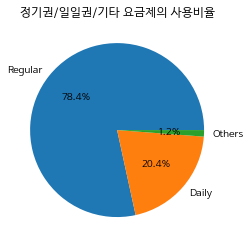

In [32]:
plt.pie(values, labels=labels, autopct="%.1f%%")
plt.rcParams['font.family']=""
plt.title('정기권/일일권/기타 요금제의 사용비율')
plt.show()

정기권(78.4%) > 일일권(20.4%) > 기타 요금제(1.2%) 순의 사용량을 보임

In [182]:
bike_type

Regular    22252339
Daily       5782977
Others       340732
Name: type, dtype: int64

In [33]:
reg=bike[bike['type']=='Regular']
day=bike[bike['type']=='Daily']
others=bike[bike['type']=='Others']

In [35]:
print('정기권 Shape : {} , 일일권 Shape : {} , 기타 요금제 Shape : {}'.format(reg.shape,day.shape,others.shape))

정기권 Shape : (22252339, 15) , 일일권 Shape : (5782977, 15) , 기타 요금제 Shape : (340732, 15)


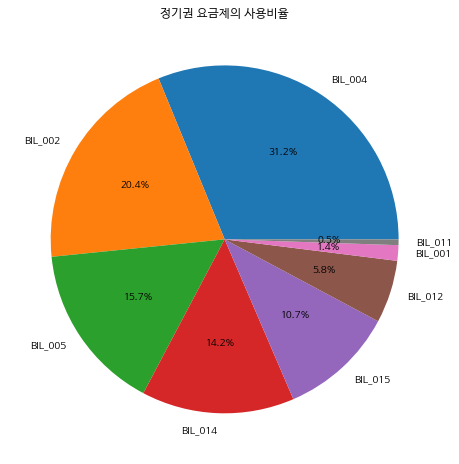

In [196]:
plt.rcParams['font.family']='Hancom Gothic'

reg_type=reg['fare'].value_counts()

labels=reg_type.index.tolist()
values=reg_type.values.tolist()

plt.figure(figsize=(10,8))
plt.pie(values, labels=labels, autopct="%.1f%%")
plt.title('정기권 요금제의 사용비율')
plt.show()

In [193]:
reg_type

BIL_004    6942703
BIL_002    4540003
BIL_005    3484363
BIL_014    3160710
BIL_015    2387914
BIL_012    1297254
BIL_001     320903
BIL_011     118489
Name: fare, dtype: int64

In [ ]:
plt.rcParams['font.family']='Hancom Gothic'

day_type=day['fare'].value_counts()

labels=day_type.index.tolist()
values=day_type.values.tolist()

plt.figure(figsize=(10,8))
plt.pie(values, labels=labels, autopct="%.1f%%")
plt.title('일일권 요금제의 사용비율')
plt.show()

In [ ]:
day_type

In [36]:
reg.to_csv('./regular_bike.csv', index=False)
day.to_csv('./daily_bike.csv', index=False)
others.to_csv('./others_bike.csv',index=False)

#### 이용시간 추이

findfont: Font family [] not found. Falling back to DejaVu Sans.


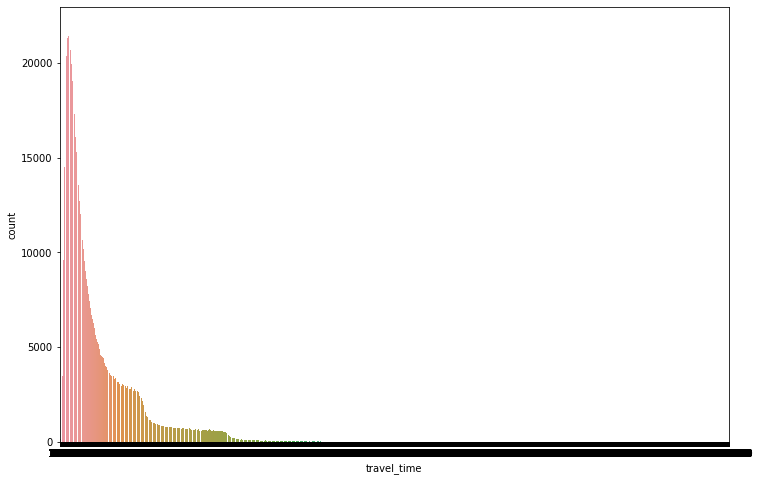

In [37]:
plt.figure(figsize=(12,8))
sns.countplot(x='travel_time', data=bike)
plt.title("따릉이 이용시간 추이")
plt.show()

MemoryError: Unable to allocate 216. MiB for an array with shape (28376048,) and data type float64

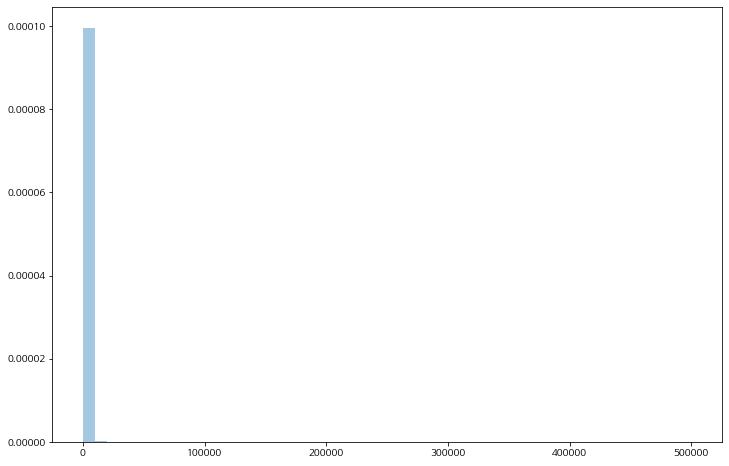

In [198]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(12,8))
sns.distplot(bike['travel_time'])
plt.title("이용시간 추이")
plt.ylabel("이용시간")
plt.show()

In [54]:
# 전체 데이터의 기초통계량 확인

bike['travel_time'].describe()

count    2.837605e+07
mean     1.660957e+03
std      1.873644e+03
min      1.000000e+00
25%      5.140000e+02
50%      9.950000e+02
75%      2.204000e+03
max      5.001840e+05
Name: travel_time, dtype: float64

In [111]:
from scipy.stats import mode

# 데이터 크기, 최빈값, 중앙값, 평균 확인
def show_describe(data_name, data):
    print("*****"+data_name+"["+str(data.name)+"]*****")
    print("데이터 크기 : {0:,.2f}".format(len(data)))
    print("최빈값 : {0:,.2f}".format(mode(data)[0][0]))
    print("중앙값 : {0:,.2f}".format(data.quantile(.5)))
    print("평균 : {0:,.2f}".format(data.mean()))

In [112]:
show_describe('bike',bike['travel_time'])

*****bike[travel_time]*****
데이터 크기 : 28,376,048.00
최빈값 : 319.00
중앙값 : 995.00
평균 : 1,660.96


### 정기권 이용시간 추이

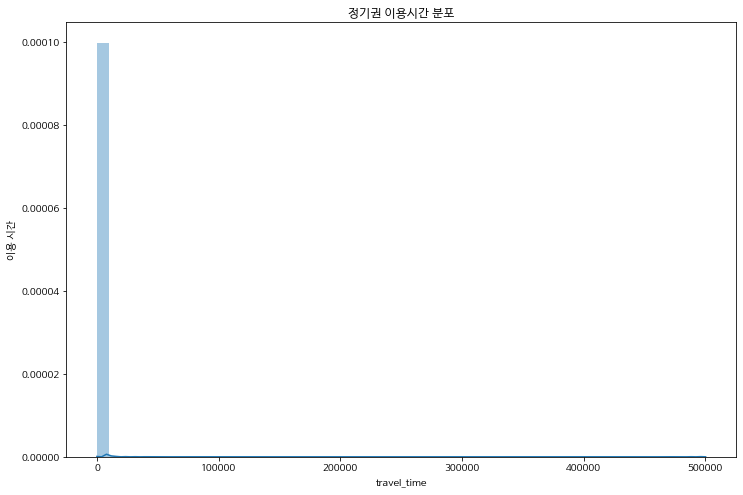

In [39]:
plt.figure(figsize=(12,8))
sns.distplot(reg['travel_time'])
plt.title('정기권 이용시간 분포')
plt.ylabel('이용 시간')
plt.show()

In [41]:
len(regular)

8

In [65]:
regular_ko=['7(1h)','30(1h)','180(1h)','365(1h)','7(2h)','30(2h)','180(2h)','365(2h)']

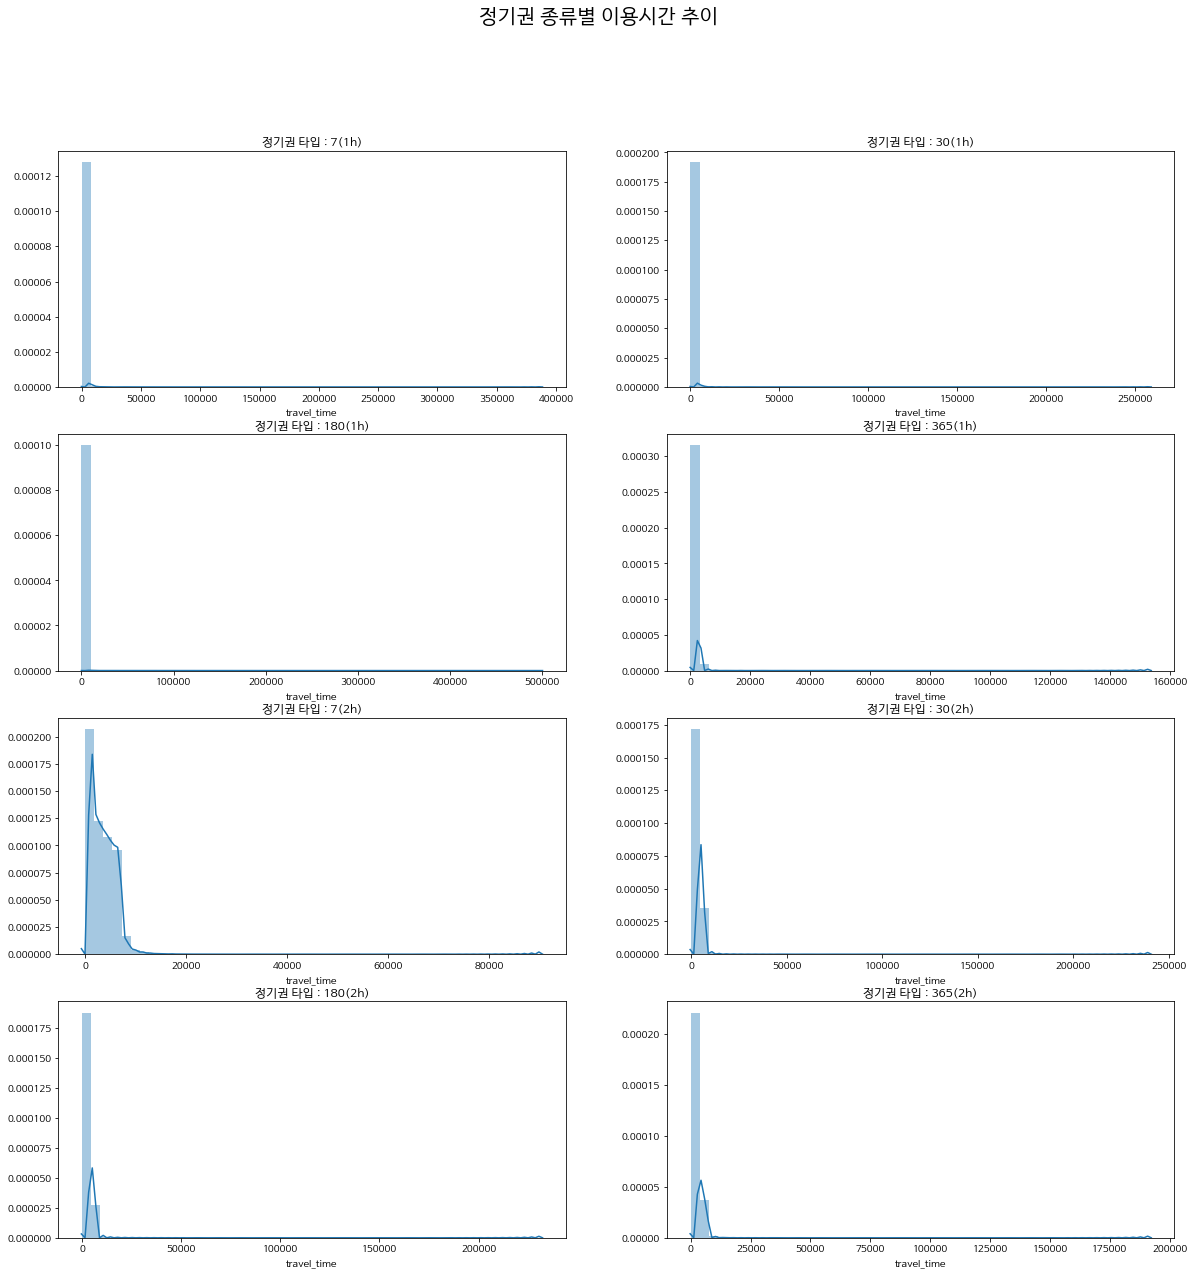

In [66]:
fig,axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(20,20)
k=0
for i in range(4):
    for j in range(2):
        bike_fare=bike[bike['fare']==regular[k]]
        sns.distplot(bike_fare['travel_time'], ax=axes[i][j])
        title='정기권 타입 : {}'.format(regular_ko[k])
        axes[i][j].set_title(title)
        k+=1

fig.suptitle('정기권 종류별 이용시간 추이', fontsize=20)
plt.show()

In [114]:
for i in range(len(regular)):
    reg_type=bike[bike['fare']==regular[i]]
    show_describe(regular_ko[i],reg_type['travel_time'])
    print("=======================")

*****7(1h)[travel_time]*****
데이터 크기 : 320,903.00
최빈값 : 465.00
중앙값 : 1,034.00
평균 : 1,476.58
*****30(1h)[travel_time]*****
데이터 크기 : 4,540,003.00
최빈값 : 427.00
중앙값 : 822.00
평균 : 1,154.71
*****180(1h)[travel_time]*****
데이터 크기 : 6,942,703.00
최빈값 : 320.00
중앙값 : 712.00
평균 : 1,014.31
*****365(1h)[travel_time]*****
데이터 크기 : 3,484,363.00
최빈값 : 318.00
중앙값 : 666.00
평균 : 968.11
*****7(2h)[travel_time]*****
데이터 크기 : 118,489.00
최빈값 : 465.00
중앙값 : 2,820.00
평균 : 3,244.93
*****30(2h)[travel_time]*****
데이터 크기 : 1,297,254.00
최빈값 : 467.00
중앙값 : 1,782.00
평균 : 2,533.78
*****180(2h)[travel_time]*****
데이터 크기 : 3,160,710.00
최빈값 : 314.00
중앙값 : 1,213.00
평균 : 2,047.14
*****365(2h)[travel_time]*****
데이터 크기 : 2,387,914.00
최빈값 : 307.00
중앙값 : 1,034.00
평균 : 1,841.80


### 데이터의 편차가 너무 크므로, IQR 이상치 제거를 실시

In [119]:
Q3=reg['travel_time'].quantile(.75)
IQR=Q3-reg['travel_time'].quantile(.25)

outlier_bound=Q3+1.5*IQR
outlier_bound

3580.5

In [120]:
time_remove_reg=reg[reg['travel_time']<=outlier_bound]
time_remove_reg.describe()

,travel_time,travel_distance,year,month,day,speed
count,2.058444e+07,2.058444e+07,2.058444e+07,2.058444e+07,2.058444e+07,2.058444e+07
mean,1.045730e+03,3.938849e+03,2.018657e+03,7.350966e+00,1.596277e+01,2.950045e+02
std,8.168993e+02,1.143188e+04,4.746703e-01,2.811690e+00,8.772884e+00,2.333348e+03
min,1.000000e+00,1.000000e+00,2.018000e+03,1.000000e+00,1.000000e+00,5.106383e-02
25%,4.360000e+02,1.070000e+03,2.018000e+03,5.000000e+00,8.000000e+00,1.224967e+02
50%,7.620000e+02,1.830000e+03,2.019000e+03,7.000000e+00,1.600000e+01,1.557053e+02
75%,1.412000e+03,3.390000e+03,2.019000e+03,1.000000e+01,2.300000e+01,1.908284e+02
max,3.580000e+03,2.559900e+05,2.019000e+03,1.200000e+01,3.100000e+01,2.230950e+06


In [121]:
show_describe('time_remove_reg',time_remove_reg['travel_time'])

*****time_remove_reg[travel_time]*****
데이터 크기 : 20,584,442.00
최빈값 : 319.00
중앙값 : 762.00
평균 : 1,045.73


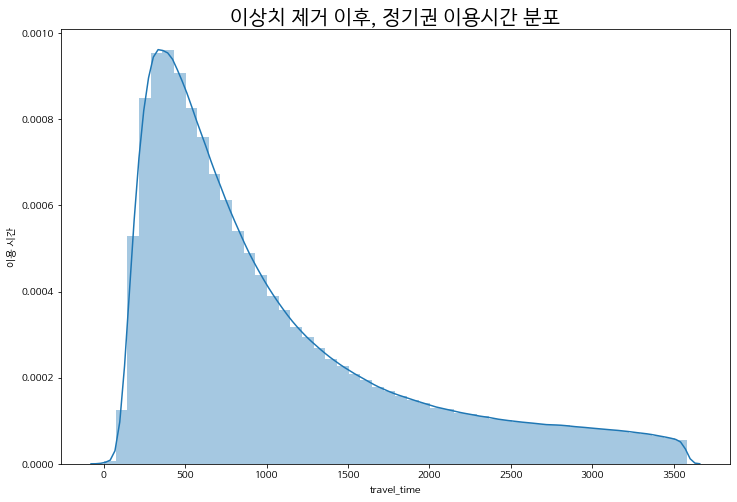

In [123]:
plt.figure(figsize=(12,8))
sns.distplot(time_remove_reg['travel_time'])
plt.title('이상치 제거 이후, 정기권 이용시간 분포', fontsize=20)
plt.ylabel('이용 시간')
plt.show()

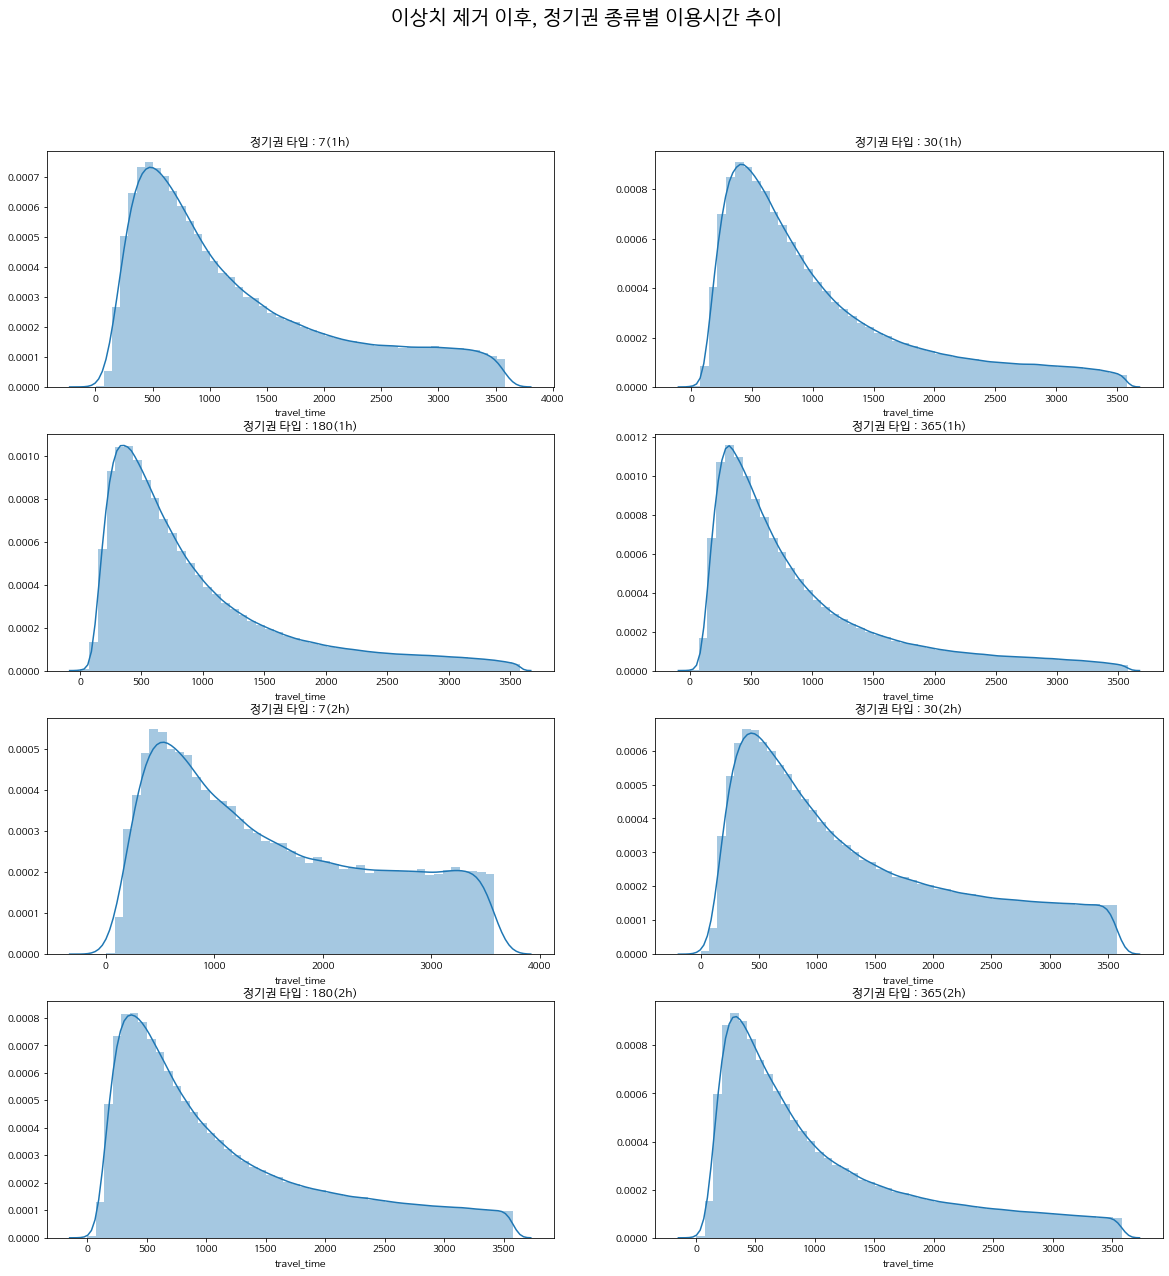

In [126]:
fig,axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(20,20)
k=0
for i in range(4):
    for j in range(2):
        reg_fare=time_remove_reg[time_remove_reg['fare']==regular[k]]
        sns.distplot(reg_fare['travel_time'], ax=axes[i][j])
        title='정기권 타입 : {}'.format(regular_ko[k])
        axes[i][j].set_title(title)
        k+=1

fig.suptitle('이상치 제거 이후, 정기권 종류별 이용시간 추이', fontsize=20)
plt.show()

In [129]:
print("■■■이상치 제거 이후, 정기권 타입별 기초통계량■■■")
for i in range(len(regular)):
    reg_type=time_remove_reg[time_remove_reg['fare']==regular[i]]
    show_describe(regular_ko[i],reg_type['travel_time'])
    print("=======================")

■■■이상치 제거 이후, 정기권 타입별 기초통계량■■■
*****7(1h)[travel_time]*****
데이터 크기 : 304,933.00
최빈값 : 465.00
중앙값 : 974.00
평균 : 1,266.55
*****30(1h)[travel_time]*****
데이터 크기 : 4,456,432.00
최빈값 : 427.00
중앙값 : 806.00
평균 : 1,075.95
*****180(1h)[travel_time]*****
데이터 크기 : 6,862,246.00
최빈값 : 320.00
중앙값 : 703.00
평균 : 960.49
*****365(1h)[travel_time]*****
데이터 크기 : 3,449,710.00
최빈값 : 318.00
중앙값 : 659.00
평균 : 920.10
*****7(2h)[travel_time]*****
데이터 크기 : 69,929.00
최빈값 : 465.00
중앙값 : 1,323.00
평균 : 1,543.51
*****30(2h)[travel_time]*****
데이터 크기 : 927,553.00
최빈값 : 467.00
중앙값 : 1,076.00
평균 : 1,358.34
*****180(2h)[travel_time]*****
데이터 크기 : 2,523,307.00
최빈값 : 314.00
중앙값 : 882.00
평균 : 1,187.19
*****365(2h)[travel_time]*****
데이터 크기 : 1,990,332.00
최빈값 : 307.00
중앙값 : 802.00
평균 : 1,113.39


### 일일권 이용시간 추이

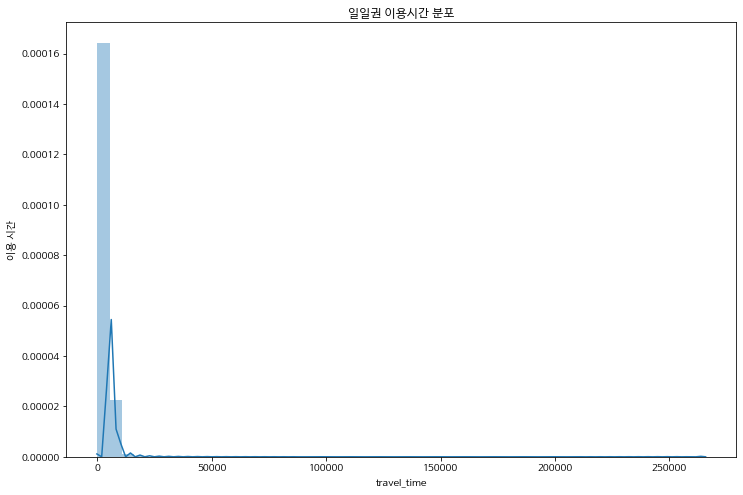

In [40]:
plt.figure(figsize=(12,8))
sns.distplot(day['travel_time'])
plt.title('일일권 이용시간 분포')
plt.ylabel('이용 시간')
plt.show()

In [68]:
len(daily)

4

In [69]:
daily_ko=['mem(1h)','nonMem(1h)','mem(2h)','nonMem(2h)']

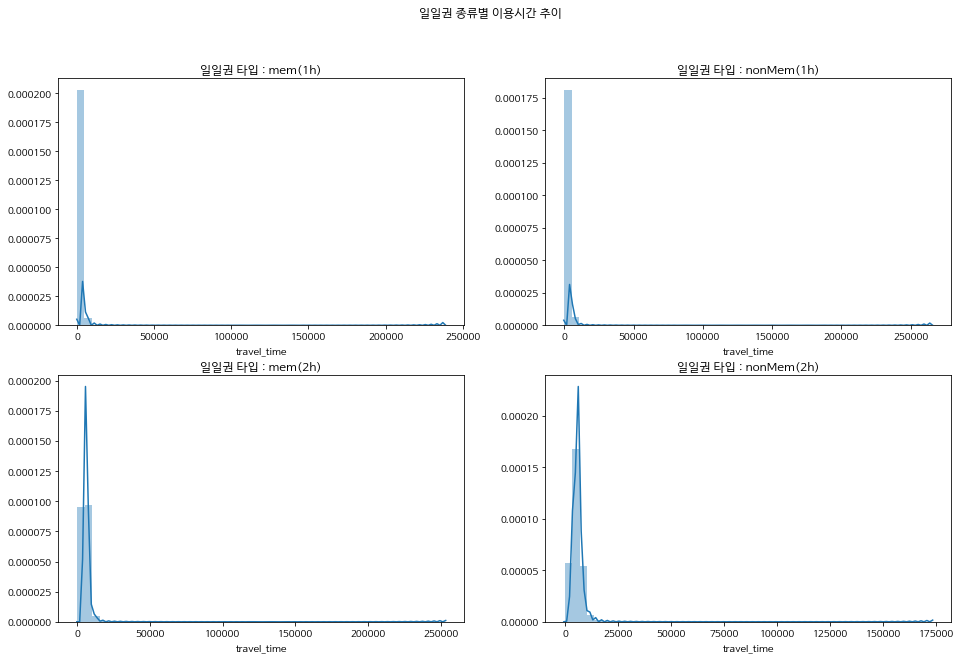

In [70]:
fig,axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(16,10)
k=0
for i in range(2):
    for j in range(2):
        bike_fare=bike[bike['fare']==daily[k]]
        sns.distplot(bike_fare['travel_time'], ax=axes[i][j])
        title='일일권 타입 : {}'.format(daily_ko[k])
        axes[i][j].set_title(title)
        k+=1

fig.suptitle('일일권 종류별 이용시간 추이')
plt.show()

### 데이터의 편차가 너무 크므로, IQR 이상치 제거를 실시

In [131]:
Q3=day['travel_time'].quantile(.75)
IQR=Q3-day['travel_time'].quantile(.25)

outlier_bound=Q3+1.5*IQR
outlier_bound

7231.5

In [132]:
time_remove_day=day[day['travel_time']<=outlier_bound]
time_remove_day.describe()

,travel_time,travel_distance,year,month,day,speed
count,5.569300e+06,5.569300e+06,5.569300e+06,5.569300e+06,5.569300e+06,5.569300e+06
mean,2.405911e+03,6.501722e+03,2.018626e+03,7.165738e+00,1.573035e+01,2.205358e+02
std,1.743456e+03,1.184282e+04,4.838916e-01,2.578887e+00,8.859095e+00,2.212768e+03
min,1.000000e+00,1.000000e+00,2.018000e+03,1.000000e+00,1.000000e+00,8.303349e-02
25%,9.740000e+02,2.030000e+03,2.018000e+03,5.000000e+00,8.000000e+00,9.962264e+01
50%,1.997000e+03,3.910000e+03,2.019000e+03,7.000000e+00,1.600000e+01,1.330753e+02
75%,3.342000e+03,7.320000e+03,2.019000e+03,9.000000e+00,2.300000e+01,1.694705e+02
max,7.231000e+03,2.559900e+05,2.019000e+03,1.200000e+01,3.100000e+01,1.159800e+06


In [133]:
show_describe('time_remove_day',time_remove_day['travel_time'])

*****time_remove_day[travel_time]*****
데이터 크기 : 5,569,300.00
최빈값 : 606.00
중앙값 : 1,997.00
평균 : 2,405.91


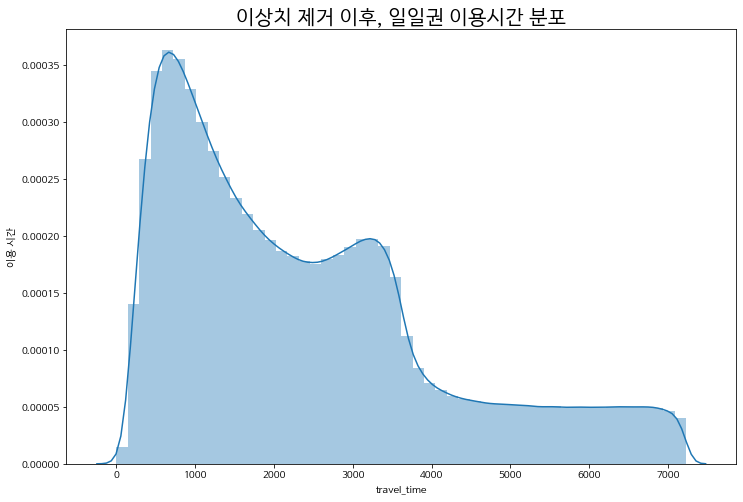

In [134]:
plt.figure(figsize=(12,8))
sns.distplot(time_remove_day['travel_time'])
plt.title('이상치 제거 이후, 일일권 이용시간 분포', fontsize=20)
plt.ylabel('이용 시간')
plt.show()

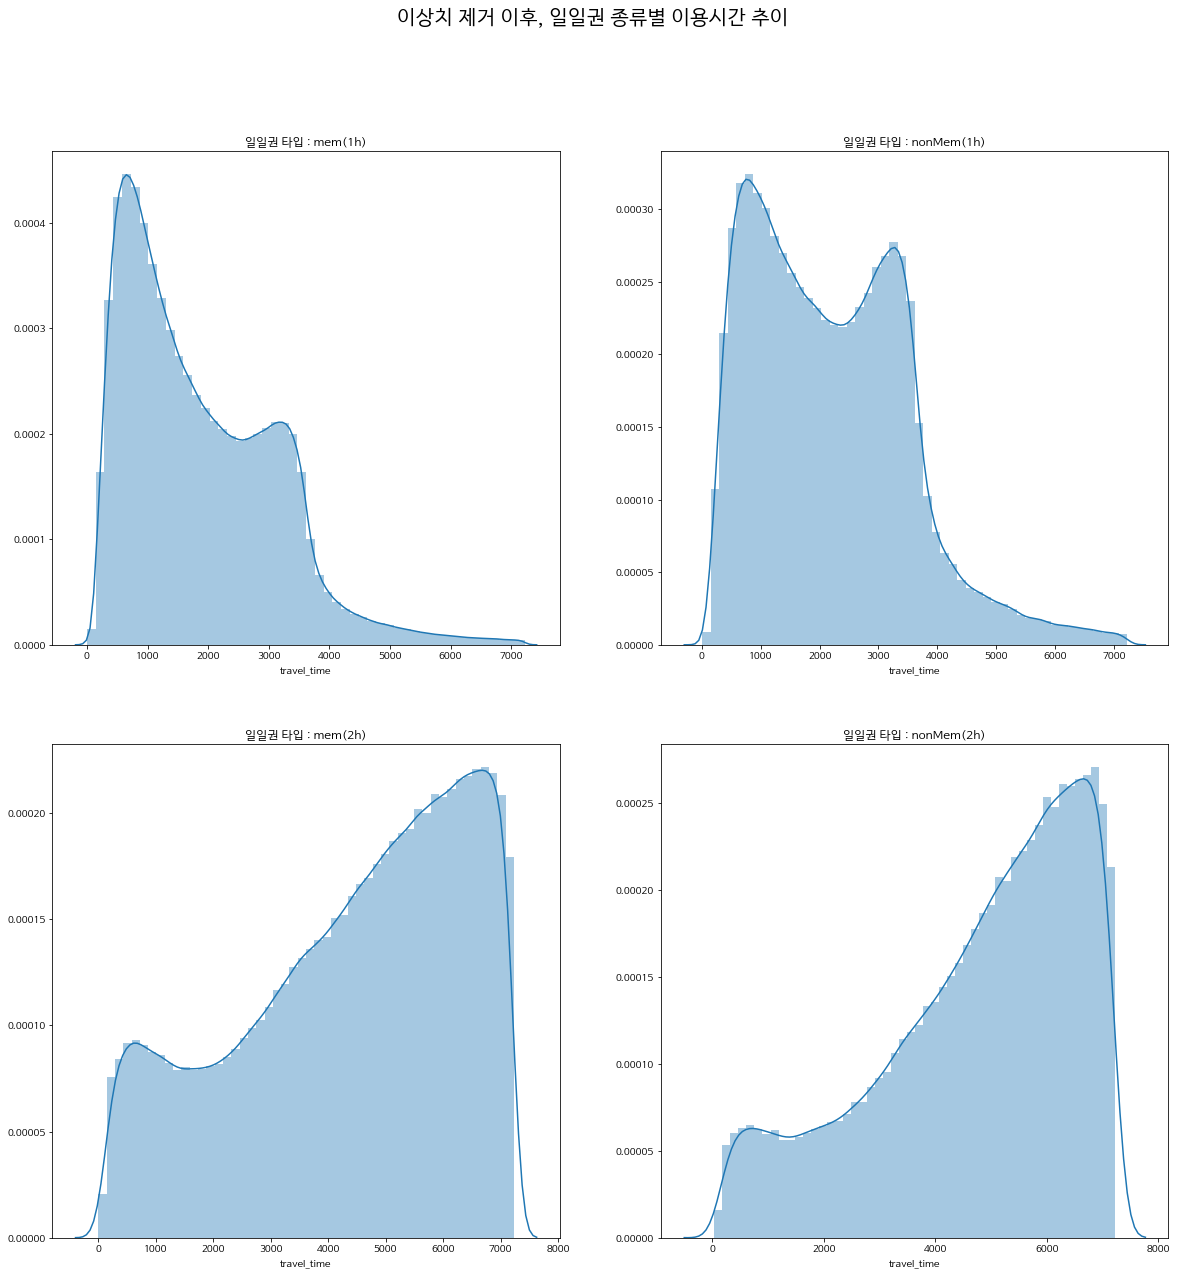

In [135]:
fig,axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,20)
k=0
for i in range(2):
    for j in range(2):
        day_fare=time_remove_day[time_remove_day['fare']==daily[k]]
        sns.distplot(day_fare['travel_time'], ax=axes[i][j])
        title='일일권 타입 : {}'.format(daily_ko[k])
        axes[i][j].set_title(title)
        k+=1

fig.suptitle('이상치 제거 이후, 일일권 종류별 이용시간 추이', fontsize=20)
plt.show()

In [136]:
print("■■■이상치 제거 이후, 일일권 타입별 기초통계량■■■")
for i in range(len(daily)):
    day_type=time_remove_day[time_remove_day['fare']==daily[i]]
    show_describe(daily_ko[i],day_type['travel_time'])
    print("=======================")

■■■이상치 제거 이후, 일일권 타입별 기초통계량■■■
*****mem(1h)[travel_time]*****
데이터 크기 : 3,959,012.00
최빈값 : 606.00
중앙값 : 1,585.00
평균 : 1,864.58
*****nonMem(1h)[travel_time]*****
데이터 크기 : 506,403.00
최빈값 : 796.00
중앙값 : 2,068.00
평균 : 2,206.80
*****mem(2h)[travel_time]*****
데이터 크기 : 956,451.00
최빈값 : 6,407.00
중앙값 : 4,755.00
평균 : 4,391.62
*****nonMem(2h)[travel_time]*****
데이터 크기 : 147,434.00
최빈값 : 6,799.00
중앙값 : 5,165.00
평균 : 4,744.22


### 이상치가 제거된 정기권과 일일권 분포 확인

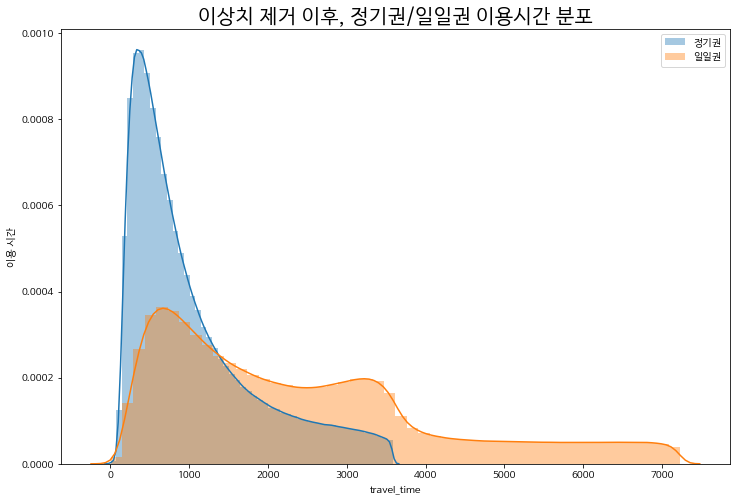

In [137]:
plt.figure(figsize=(12,8))
sns.distplot(time_remove_reg['travel_time'], label='정기권')
sns.distplot(time_remove_day['travel_time'], label='일일권')
plt.title('이상치 제거 이후, 정기권/일일권 이용시간 분포', fontsize=20)
plt.ylabel('이용 시간')
plt.legend()
plt.show()

In [140]:
reg_1h=['BIL_001','BIL_002','BIL_004','BIL_005']
reg_1h_ko=['7(1h)','30(1h)','180(1h)','365(1h)']
day_1h=['BIL_006','BIL_007']
day_1h_ko=['mem(1h)','nonMem(1h)']

#### 정기권 1시간권 끼리의 비교

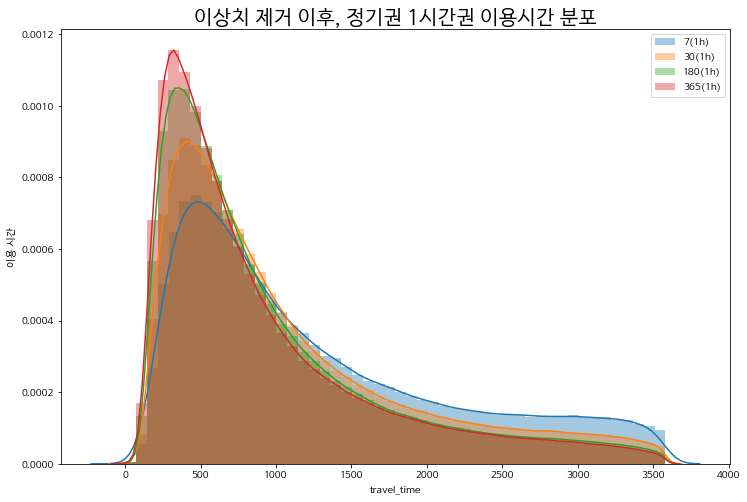

In [148]:
plt.figure(figsize=(12,8))
for i in range(len(reg_1h)):
    reg_fare=time_remove_reg[time_remove_reg['fare']==reg_1h[i]]
    sns.distplot(reg_fare['travel_time'], label=reg_1h_ko[i])

plt.title('이상치 제거 이후, 정기권 1시간권 이용시간 분포', fontsize=20)
plt.ylabel('이용 시간')
plt.legend()
plt.show()

#### 일일권 1시간권 끼리의 비교

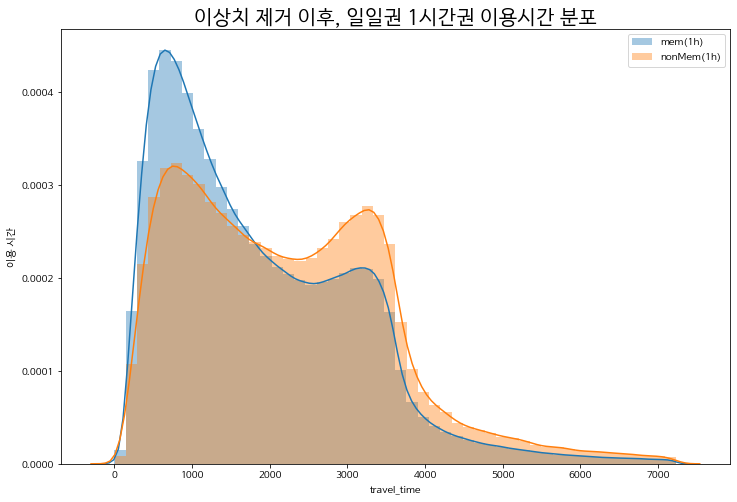

In [146]:
plt.figure(figsize=(12,8))
for i in range(len(day_1h)):
    day_fare=time_remove_day[time_remove_day['fare']==day_1h[i]]
    sns.distplot(day_fare['travel_time'], label=day_1h_ko[i])
    
plt.title('이상치 제거 이후, 일일권 1시간권 이용시간 분포', fontsize=20)
plt.ylabel('이용 시간')
plt.legend()
plt.show()

#### 정기권/일일권 1시간권 끼리의 비교

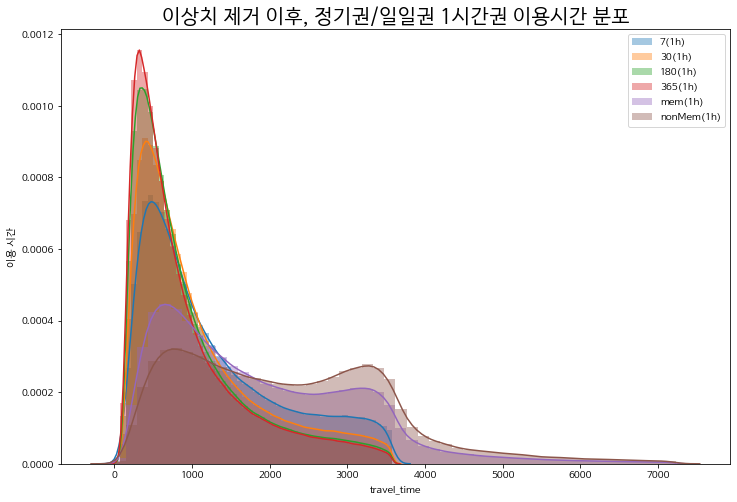

In [144]:
plt.figure(figsize=(12,8))
for i in range(len(reg_1h)):
    reg_fare=time_remove_reg[time_remove_reg['fare']==reg_1h[i]]
    sns.distplot(reg_fare['travel_time'], label=reg_1h_ko[i])
    
for i in range(len(day_1h)):
    day_fare=time_remove_day[time_remove_day['fare']==day_1h[i]]
    sns.distplot(day_fare['travel_time'], label=day_1h_ko[i])
    
plt.title('이상치 제거 이후, 정기권/일일권 1시간권 이용시간 분포', fontsize=20)
plt.ylabel('이용 시간')
plt.legend()
plt.show()

In [149]:
reg_2h=['BIL_011','BIL_012','BIL_014','BIL_015']
reg_2h_ko=['7(2h)','30(2h)','180(2h)','365(2h)']
day_2h=['BIL_016','BIL_017']
day_2h_ko=['mem(2h)','nonMem(2h)']

#### 정기권 2시간권 끼리의 비교

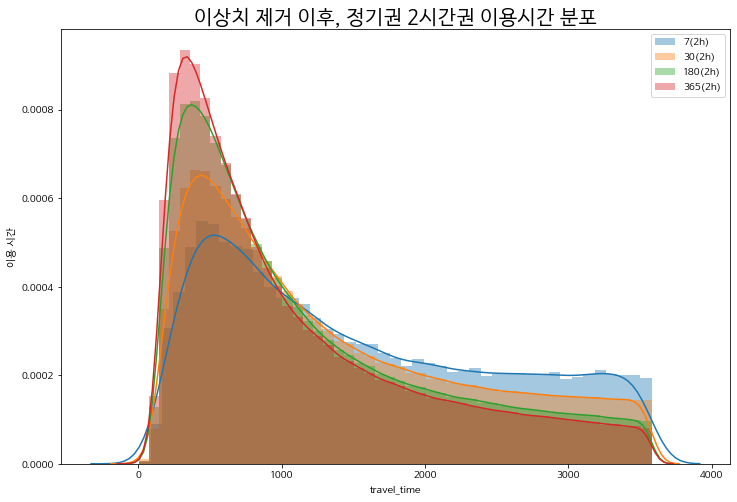

In [150]:
plt.figure(figsize=(12,8))
for i in range(len(reg_2h)):
    reg_fare=time_remove_reg[time_remove_reg['fare']==reg_2h[i]]
    sns.distplot(reg_fare['travel_time'], label=reg_2h_ko[i])

plt.title('이상치 제거 이후, 정기권 2시간권 이용시간 분포', fontsize=20)
plt.ylabel('이용 시간')
plt.legend()
plt.show()

#### 일일권 2시간권 끼리의 비교

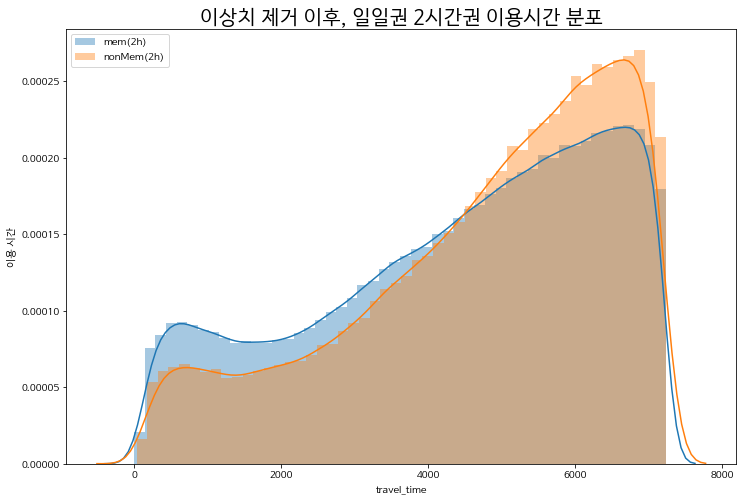

In [151]:
plt.figure(figsize=(12,8))
for i in range(len(day_2h)):
    day_fare=time_remove_day[time_remove_day['fare']==day_2h[i]]
    sns.distplot(day_fare['travel_time'], label=day_2h_ko[i])
    
plt.title('이상치 제거 이후, 일일권 2시간권 이용시간 분포', fontsize=20)
plt.ylabel('이용 시간')
plt.legend()
plt.show()

#### 정기권/일일권 2시간권 끼리의 비교

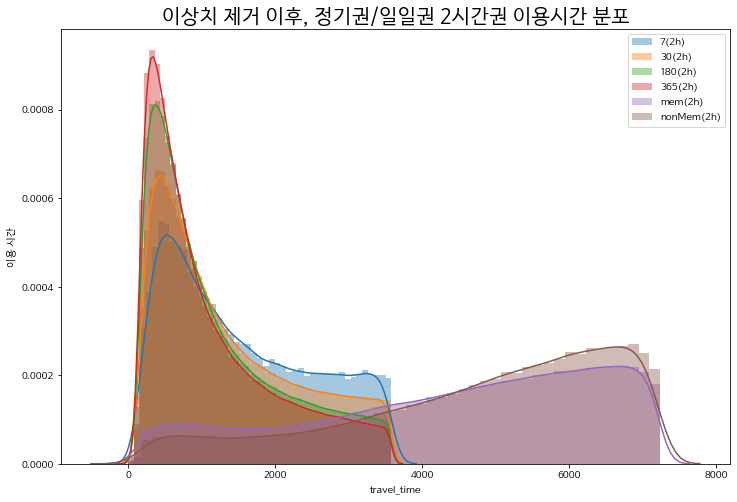

In [152]:
plt.figure(figsize=(12,8))
for i in range(len(reg_2h)):
    reg_fare=time_remove_reg[time_remove_reg['fare']==reg_2h[i]]
    sns.distplot(reg_fare['travel_time'], label=reg_2h_ko[i])
    
for i in range(len(day_2h)):
    day_fare=time_remove_day[time_remove_day['fare']==day_2h[i]]
    sns.distplot(day_fare['travel_time'], label=day_2h_ko[i])
    
plt.title('이상치 제거 이후, 정기권/일일권 2시간권 이용시간 분포', fontsize=20)
plt.ylabel('이용 시간')
plt.legend()
plt.show()

## 이용거리 추이

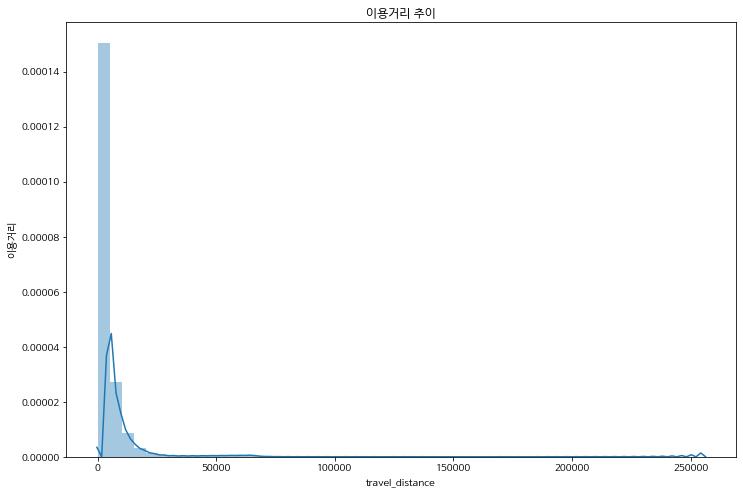

In [153]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(12,8))
sns.distplot(bike['travel_distance'])
plt.title("이용거리 추이")
plt.ylabel("이용거리")
plt.show()

In [154]:
# 전체 데이터의 기초통계량 확인

bike['travel_distance'].describe()

count    2.837605e+07
mean     4.997236e+03
std      1.185660e+04
min      1.000000e+00
25%      1.220000e+03
50%      2.260000e+03
75%      4.740000e+03
max      2.559900e+05
Name: travel_distance, dtype: float64

In [155]:
show_describe('bike',bike['travel_distance'])

*****bike[travel_distance]*****
데이터 크기 : 28,376,048.00
최빈값 : 910.00
중앙값 : 2,260.00
평균 : 4,997.24


### 정기권 이용거리 추이

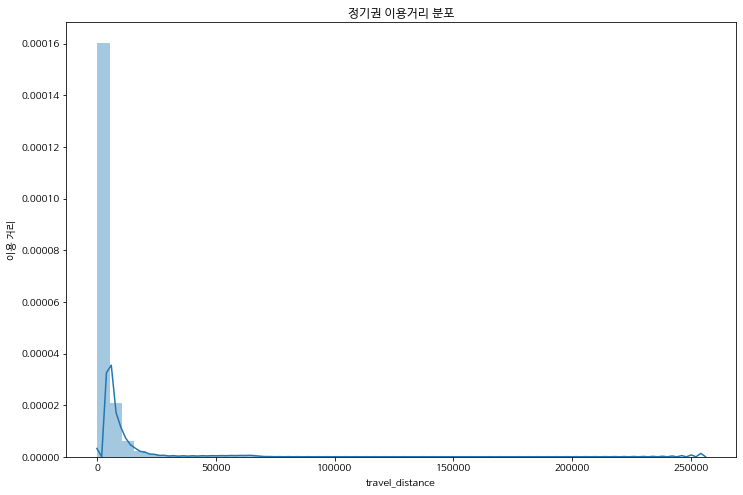

In [156]:
plt.figure(figsize=(12,8))
sns.distplot(reg['travel_distance'])
plt.title('정기권 이용거리 분포')
plt.ylabel('이용 거리')
plt.show()

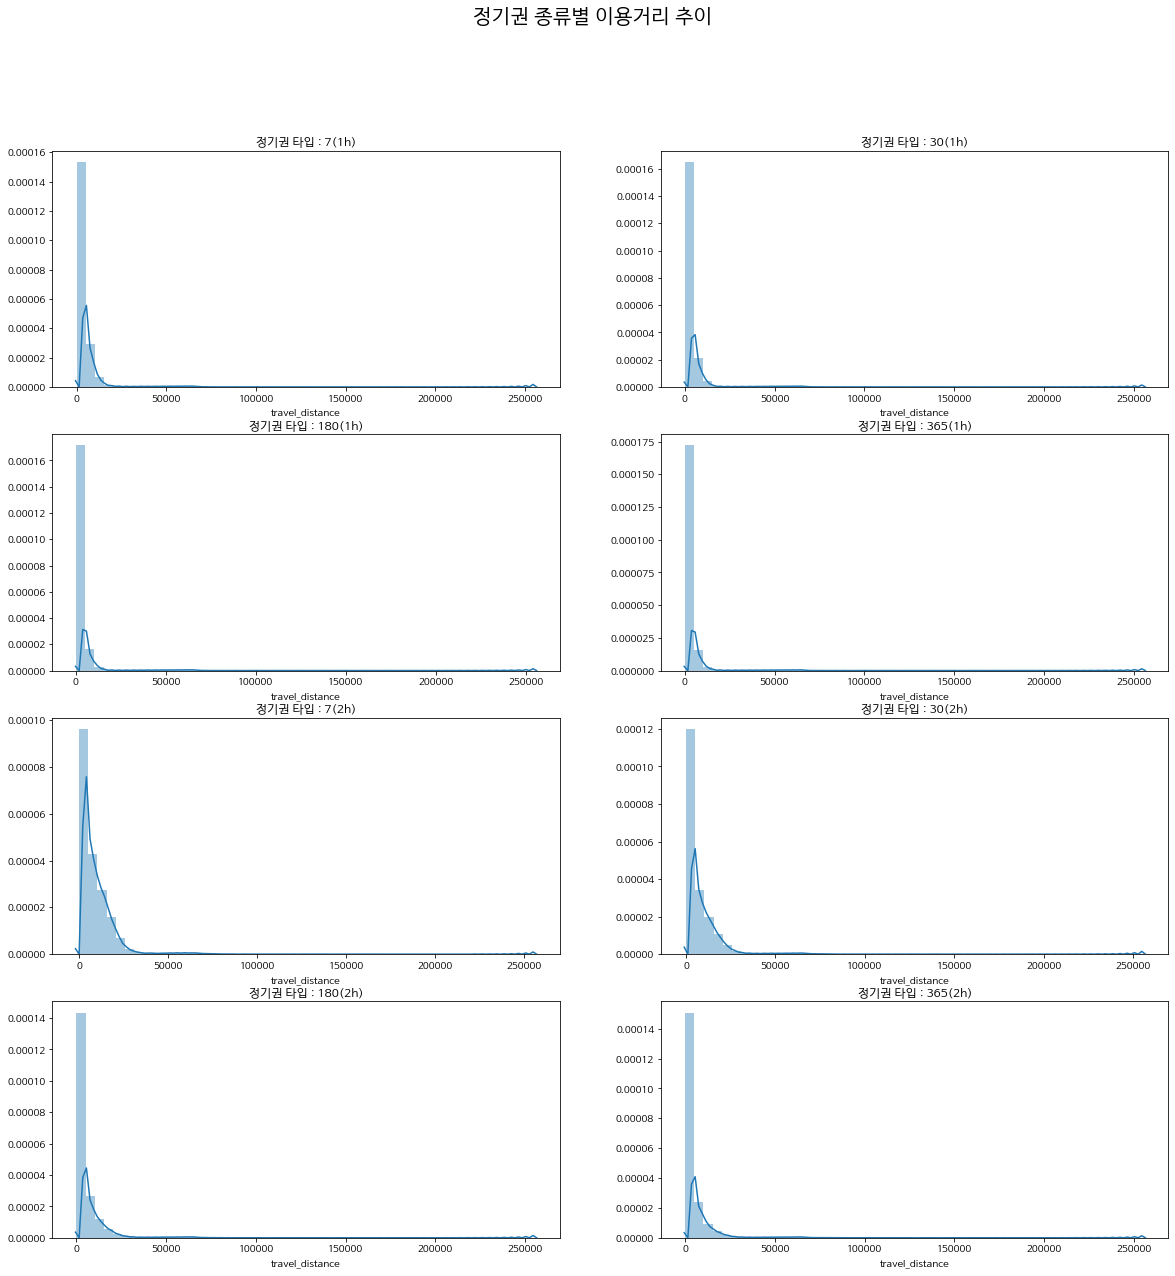

In [157]:
fig,axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(20,20)
k=0
for i in range(4):
    for j in range(2):
        bike_fare=bike[bike['fare']==regular[k]]
        sns.distplot(bike_fare['travel_distance'], ax=axes[i][j])
        title='정기권 타입 : {}'.format(regular_ko[k])
        axes[i][j].set_title(title)
        k+=1

fig.suptitle('정기권 종류별 이용거리 추이', fontsize=20)
plt.show()

In [158]:
for i in range(len(regular)):
    reg_type=bike[bike['fare']==regular[i]]
    show_describe(regular_ko[i],reg_type['travel_distance'])
    print("=======================")

*****7(1h)[travel_distance]*****
데이터 크기 : 320,903.00
최빈값 : 1,140.00
중앙값 : 2,330.00
평균 : 4,734.71
*****30(1h)[travel_distance]*****
데이터 크기 : 4,540,003.00
최빈값 : 910.00
중앙값 : 1,970.00
평균 : 4,164.26
*****180(1h)[travel_distance]*****
데이터 크기 : 6,942,703.00
최빈값 : 910.00
중앙값 : 1,750.00
평균 : 3,795.55
*****365(1h)[travel_distance]*****
데이터 크기 : 3,484,363.00
최빈값 : 910.00
중앙값 : 1,670.00
평균 : 3,671.03
*****7(2h)[travel_distance]*****
데이터 크기 : 118,489.00
최빈값 : 1,350.00
중앙값 : 5,280.00
평균 : 8,671.94
*****30(2h)[travel_distance]*****
데이터 크기 : 1,297,254.00
최빈값 : 1,170.00
중앙값 : 3,410.00
평균 : 7,169.67
*****180(2h)[travel_distance]*****
데이터 크기 : 3,160,710.00
최빈값 : 910.00
중앙값 : 2,400.00
평균 : 5,601.90
*****365(2h)[travel_distance]*****
데이터 크기 : 2,387,914.00
최빈값 : 910.00
중앙값 : 2,130.00
평균 : 5,083.92


### 데이터의 편차가 너무 크므로, IQR 이상치 제거를 실시

In [159]:
Q3=reg['travel_distance'].quantile(.75)
IQR=Q3-reg['travel_distance'].quantile(.25)

outlier_bound=Q3+1.5*IQR
outlier_bound

7935.0

In [160]:
distance_remove_reg=reg[reg['travel_distance']<=outlier_bound]
distance_remove_reg.describe()

,travel_time,travel_distance,year,month,day,speed
count,1.995222e+07,1.995222e+07,1.995222e+07,1.995222e+07,1.995222e+07,1.995222e+07
mean,1.140107e+03,2.269050e+03,2.018655e+03,7.349085e+00,1.596352e+01,1.506108e+02
std,1.348281e+03,1.672660e+03,4.752881e-01,2.826720e+00,8.774328e+00,5.087180e+02
min,1.000000e+00,1.000000e+00,2.018000e+03,1.000000e+00,1.000000e+00,6.218197e-03
25%,4.330000e+02,1.040000e+03,2.018000e+03,5.000000e+00,8.000000e+00,1.149758e+02
50%,7.540000e+02,1.740000e+03,2.019000e+03,7.000000e+00,1.600000e+01,1.492834e+02
75%,1.385000e+03,3.000000e+03,2.019000e+03,1.000000e+01,2.300000e+01,1.823529e+02
max,5.001840e+05,7.930000e+03,2.019000e+03,1.200000e+01,3.100000e+01,4.266000e+05


In [161]:
show_describe('distance_remove_reg',distance_remove_reg['travel_distance'])

*****distance_remove_reg[travel_distance]*****
데이터 크기 : 19,952,219.00
최빈값 : 910.00
중앙값 : 1,740.00
평균 : 2,269.05


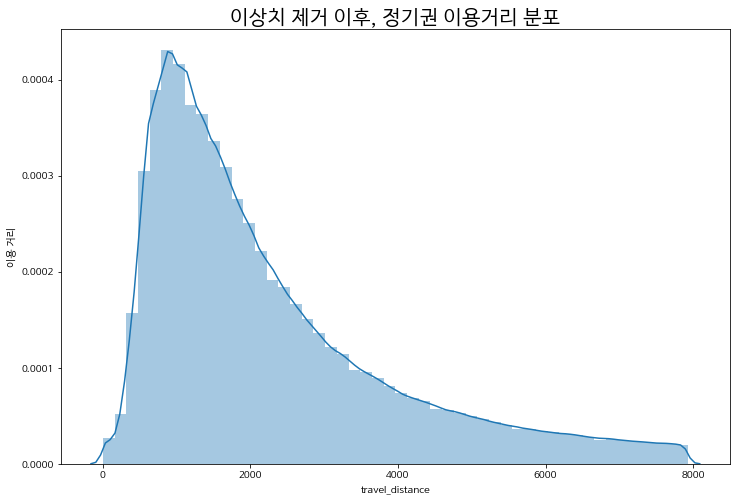

In [162]:
plt.figure(figsize=(12,8))
sns.distplot(distance_remove_reg['travel_distance'])
plt.title('이상치 제거 이후, 정기권 이용거리 분포', fontsize=20)
plt.ylabel('이용 거리')
plt.show()

#### 정기권 종류별 이용거리 분포

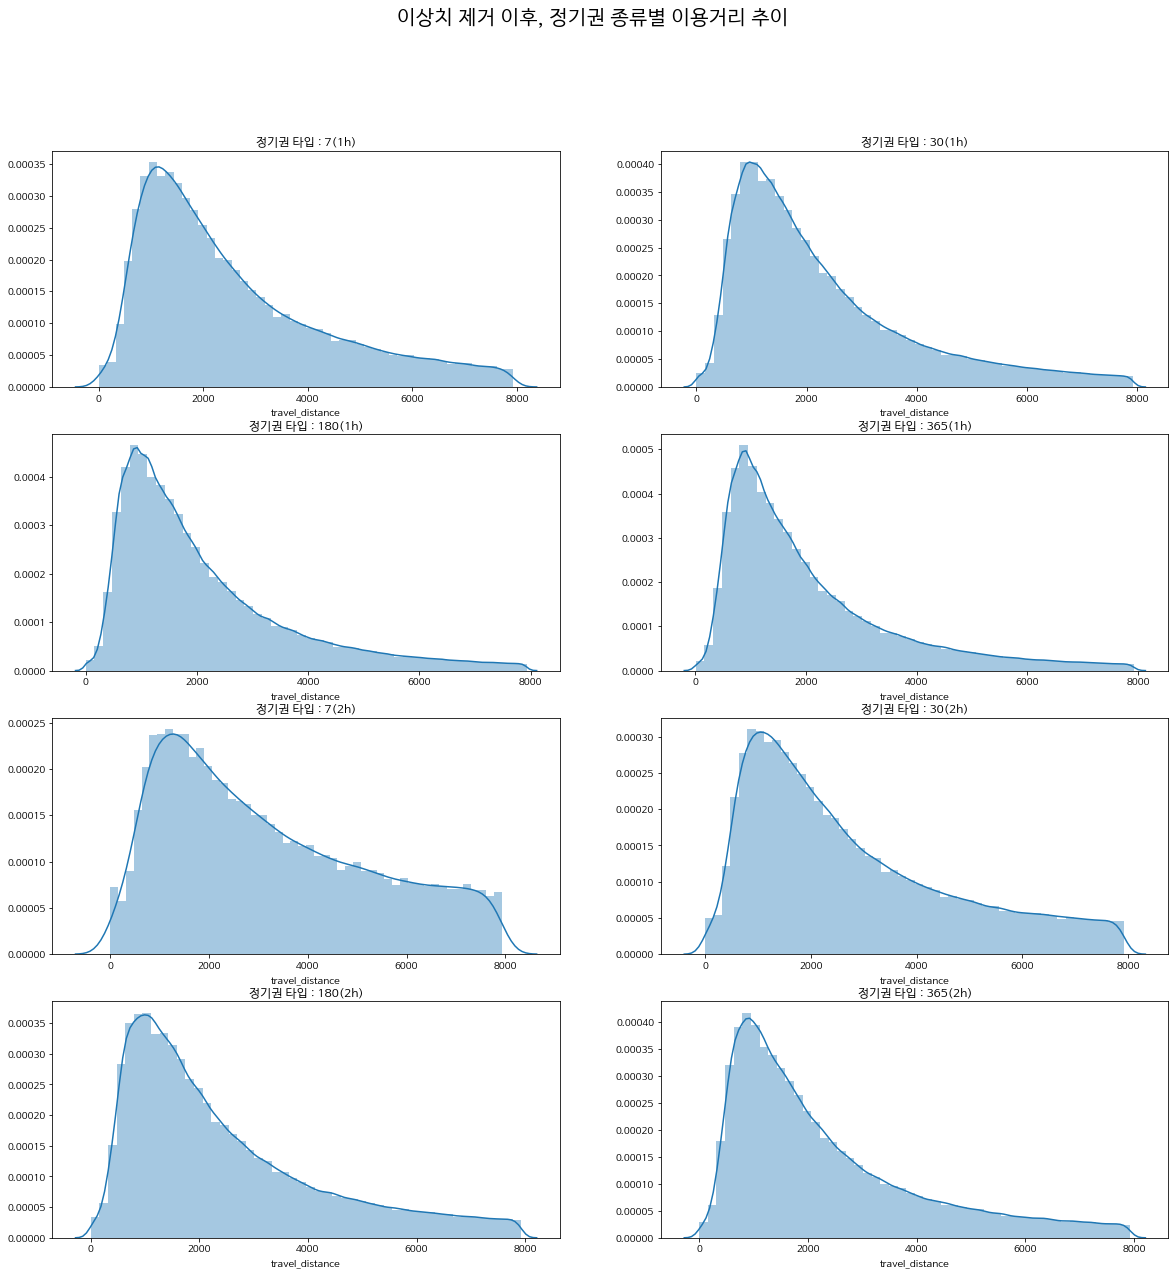

In [163]:
fig,axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(20,20)
k=0
for i in range(4):
    for j in range(2):
        reg_fare=distance_remove_reg[distance_remove_reg['fare']==regular[k]]
        sns.distplot(reg_fare['travel_distance'], ax=axes[i][j])
        title='정기권 타입 : {}'.format(regular_ko[k])
        axes[i][j].set_title(title)
        k+=1

fig.suptitle('이상치 제거 이후, 정기권 종류별 이용거리 추이', fontsize=20)
plt.show()

In [164]:
print("■■■이상치 제거 이후, 정기권 타입별 기초통계량■■■")
for i in range(len(regular)):
    reg_type=distance_remove_reg[distance_remove_reg['fare']==regular[i]]
    show_describe(regular_ko[i],reg_type['travel_distance'])
    print("=======================")

■■■이상치 제거 이후, 정기권 타입별 기초통계량■■■
*****7(1h)[travel_distance]*****
데이터 크기 : 286,243.00
최빈값 : 1,140.00
중앙값 : 2,070.00
평균 : 2,606.94
*****30(1h)[travel_distance]*****
데이터 크기 : 4,196,012.00
최빈값 : 910.00
중앙값 : 1,820.00
평균 : 2,323.24
*****180(1h)[travel_distance]*****
데이터 크기 : 6,521,077.00
최빈값 : 910.00
중앙값 : 1,640.00
평균 : 2,127.77
*****365(1h)[travel_distance]*****
데이터 크기 : 3,281,428.00
최빈값 : 910.00
중앙값 : 1,570.00
평균 : 2,072.81
*****7(2h)[travel_distance]*****
데이터 크기 : 73,946.00
최빈값 : 1,350.00
중앙값 : 2,730.00
평균 : 3,205.22
*****30(2h)[travel_distance]*****
데이터 크기 : 940,608.00
최빈값 : 1,170.00
중앙값 : 2,220.00
평균 : 2,788.67
*****180(2h)[travel_distance]*****
데이터 크기 : 2,610,234.00
최빈값 : 910.00
중앙값 : 1,910.00
평균 : 2,473.90
*****365(2h)[travel_distance]*****
데이터 크기 : 2,042,671.00
최빈값 : 910.00
중앙값 : 1,780.00
평균 : 2,341.73


### 일일권 이용거리 추이

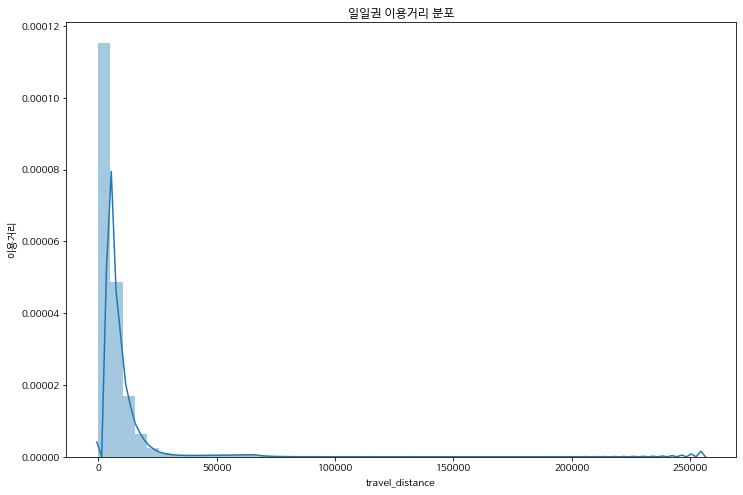

In [165]:
plt.figure(figsize=(12,8))
sns.distplot(day['travel_distance'])
plt.title('일일권 이용거리 분포')
plt.ylabel('이용거리')
plt.show()

#### 일일권 종류별 이용거리 분포

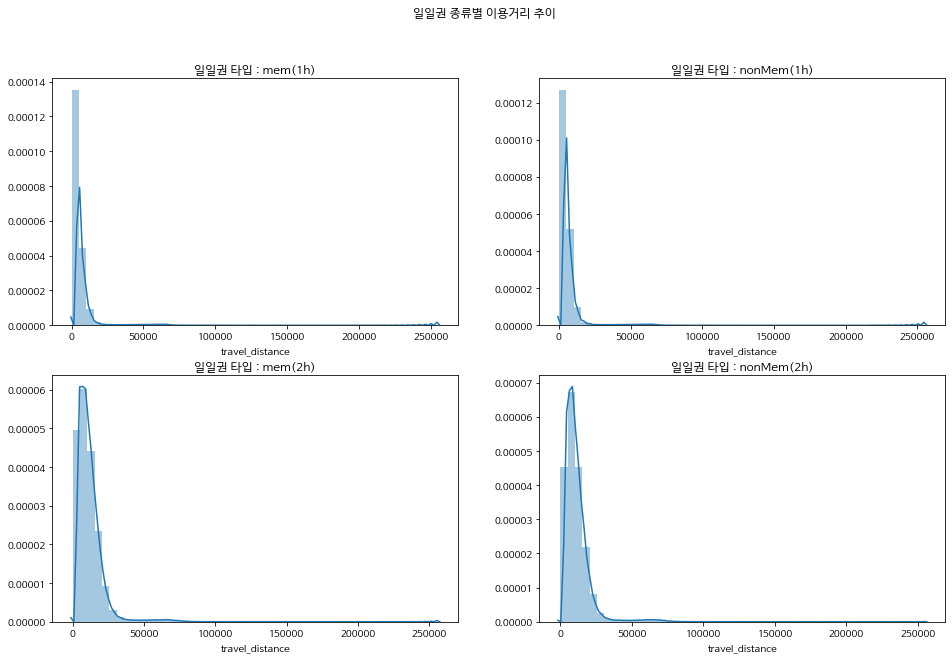

In [166]:
fig,axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(16,10)
k=0
for i in range(2):
    for j in range(2):
        bike_fare=bike[bike['fare']==daily[k]]
        sns.distplot(bike_fare['travel_distance'], ax=axes[i][j])
        title='일일권 타입 : {}'.format(daily_ko[k])
        axes[i][j].set_title(title)
        k+=1

fig.suptitle('일일권 종류별 이용거리 추이')
plt.show()

#### 데이터 편차가 너무 크므로, IQR 이상치 제거 실시

In [167]:
Q3=day['travel_distance'].quantile(.75)
IQR=Q3-day['travel_distance'].quantile(.25)

outlier_bound=Q3+1.5*IQR
outlier_bound

16230.0

In [168]:
distance_remove_day=day[day['travel_distance']<=outlier_bound]
distance_remove_day.describe()

,travel_time,travel_distance,year,month,day,speed
count,5.410935e+06,5.410935e+06,5.410935e+06,5.410935e+06,5.410935e+06,5.410935e+06
mean,2.468150e+03,4.811651e+03,2.018622e+03,7.152860e+00,1.572472e+01,1.457218e+02
std,2.085308e+03,3.610566e+03,4.849478e-01,2.582618e+00,8.861071e+00,1.406463e+03
min,1.000000e+00,1.000000e+00,2.018000e+03,1.000000e+00,1.000000e+00,9.520938e-03
25%,9.690000e+02,1.980000e+03,2.018000e+03,5.000000e+00,8.000000e+00,9.551447e+01
50%,1.984000e+03,3.760000e+03,2.019000e+03,7.000000e+00,1.600000e+01,1.284076e+02
75%,3.325000e+03,6.800000e+03,2.019000e+03,9.000000e+00,2.300000e+01,1.625784e+02
max,2.656110e+05,1.623000e+04,2.019000e+03,1.200000e+01,3.100000e+01,7.830000e+05


In [169]:
show_describe('distance_remove_day',distance_remove_day['travel_distance'])

*****distance_remove_day[travel_distance]*****
데이터 크기 : 5,410,935.00
최빈값 : 1,590.00
중앙값 : 3,760.00
평균 : 4,811.65


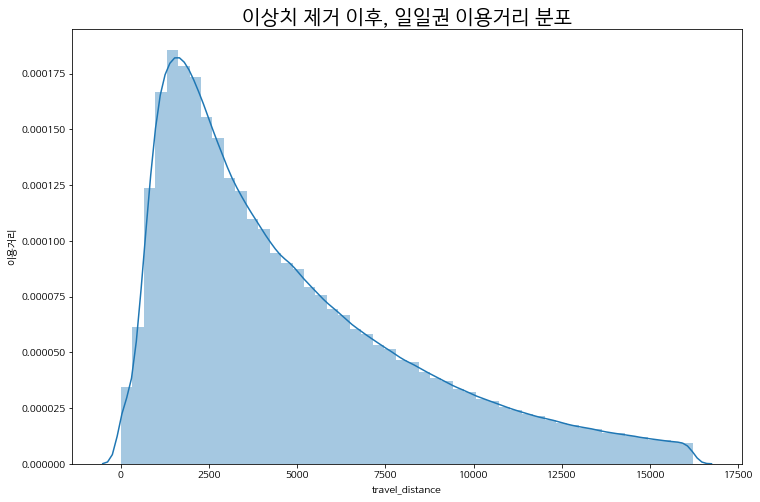

In [170]:
plt.figure(figsize=(12,8))
sns.distplot(distance_remove_day['travel_distance'])
plt.title('이상치 제거 이후, 일일권 이용거리 분포', fontsize=20)
plt.ylabel('이용거리')
plt.show()

#### 이상치 제거 이후, 일일권 종류별 이용거리 분포

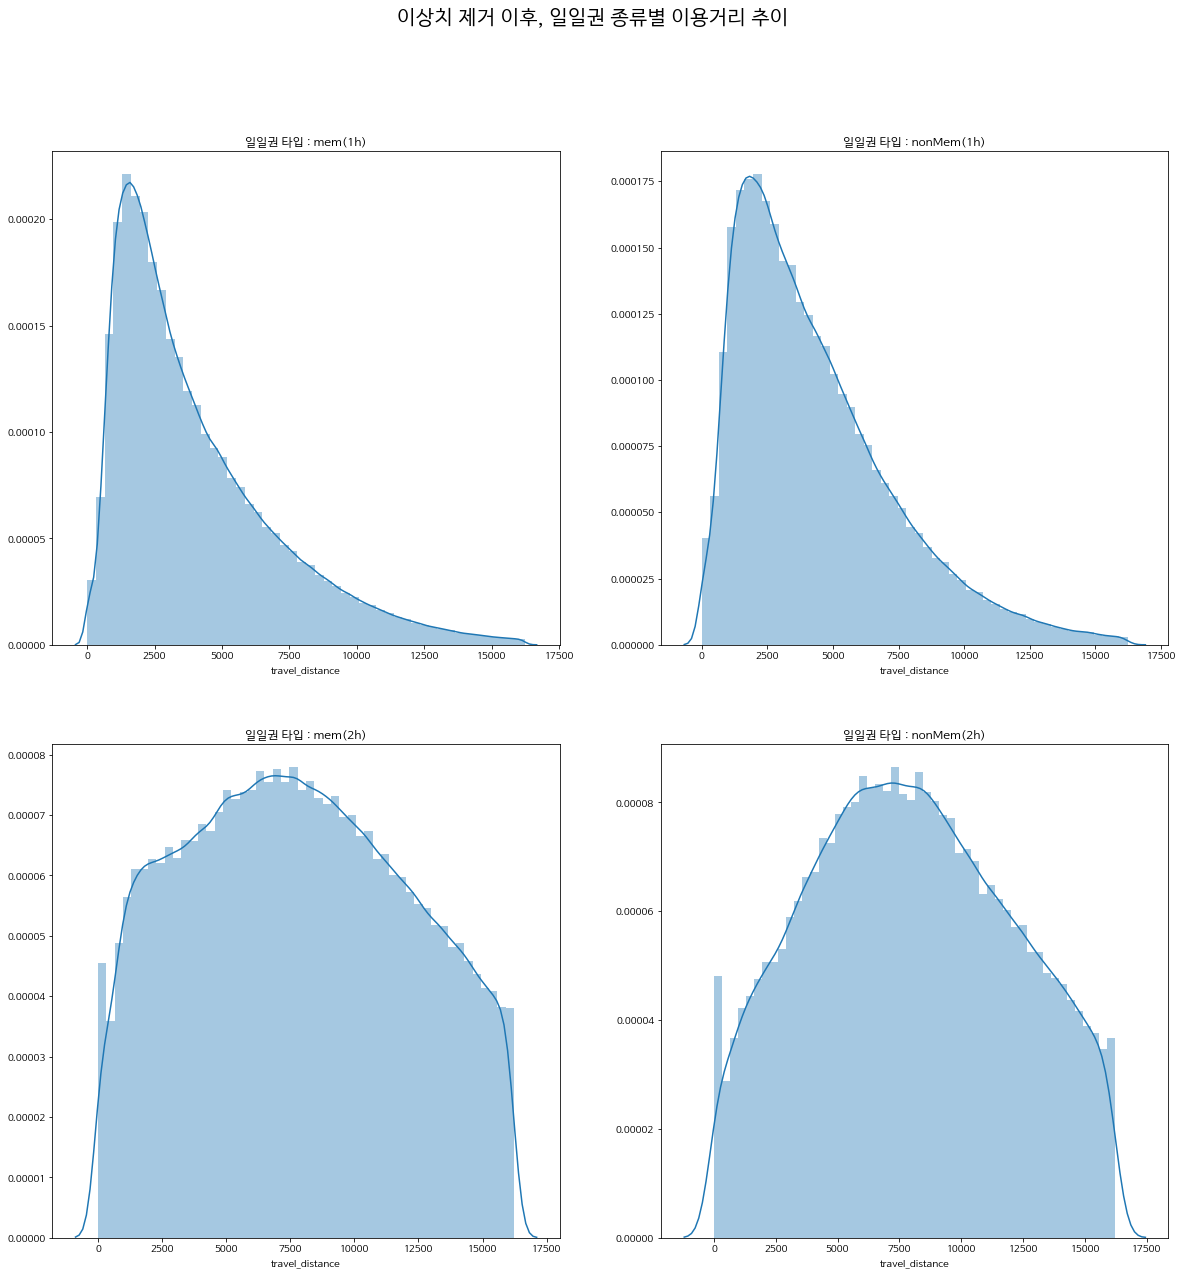

In [171]:
fig,axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,20)
k=0
for i in range(2):
    for j in range(2):
        day_fare=distance_remove_day[distance_remove_day['fare']==daily[k]]
        sns.distplot(day_fare['travel_distance'], ax=axes[i][j])
        title='일일권 타입 : {}'.format(daily_ko[k])
        axes[i][j].set_title(title)
        k+=1

fig.suptitle('이상치 제거 이후, 일일권 종류별 이용거리 추이', fontsize=20)
plt.show()

In [173]:
print("■■■이상치 제거 이후, 일일권 타입별 기초통계량■■■")
for i in range(len(daily)):
    day_type=distance_remove_day[distance_remove_day['fare']==daily[i]]
    show_describe(daily_ko[i],day_type['travel_distance'])
    print("=======================")

■■■이상치 제거 이후, 일일권 타입별 기초통계량■■■
*****mem(1h)[travel_distance]*****
데이터 크기 : 3,866,591.00
최빈값 : 1,590.00
중앙값 : 3,170.00
평균 : 4,058.98
*****nonMem(1h)[travel_distance]*****
데이터 크기 : 497,286.00
최빈값 : 10.00
중앙값 : 3,660.00
평균 : 4,371.23
*****mem(2h)[travel_distance]*****
데이터 크기 : 899,548.00
최빈값 : 10.00
중앙값 : 7,640.00
평균 : 7,779.19
*****nonMem(2h)[travel_distance]*****
데이터 크기 : 147,510.00
최빈값 : 10.00
중앙값 : 7,800.00
평균 : 7,929.14


### 이상치가 제거된 정기권/일일권 이용거리 분포 확인

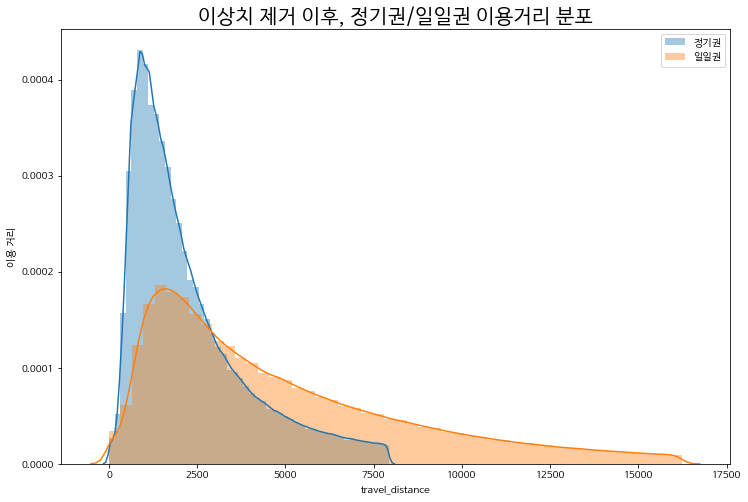

In [174]:
plt.figure(figsize=(12,8))
sns.distplot(distance_remove_reg['travel_distance'], label='정기권')
sns.distplot(distance_remove_day['travel_distance'], label='일일권')
plt.title('이상치 제거 이후, 정기권/일일권 이용거리 분포', fontsize=20)
plt.ylabel('이용 거리')
plt.legend()
plt.show()

#### 정기권 1시간권 끼리 비교

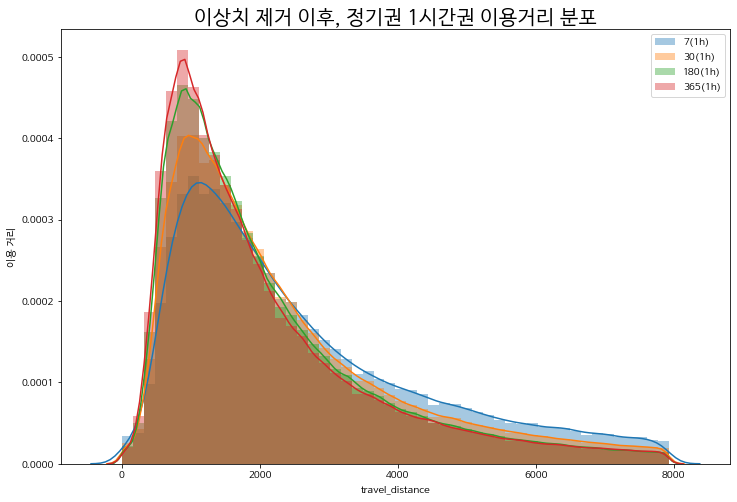

In [175]:
plt.figure(figsize=(12,8))
for i in range(len(reg_1h)):
    reg_fare=distance_remove_reg[distance_remove_reg['fare']==reg_1h[i]]
    sns.distplot(reg_fare['travel_distance'], label=reg_1h_ko[i])

plt.title('이상치 제거 이후, 정기권 1시간권 이용거리 분포', fontsize=20)
plt.ylabel('이용 거리')
plt.legend()
plt.show()

#### 일일권 1시간권 끼리 비교

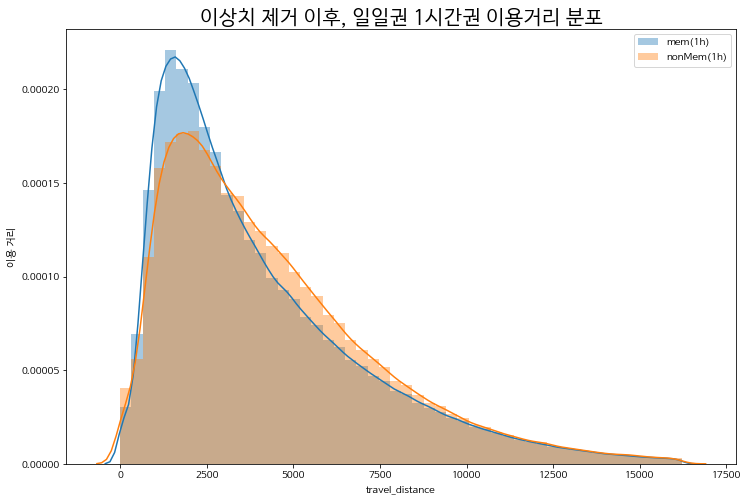

In [176]:
plt.figure(figsize=(12,8))
for i in range(len(day_1h)):
    day_fare=distance_remove_day[distance_remove_day['fare']==day_1h[i]]
    sns.distplot(day_fare['travel_distance'], label=day_1h_ko[i])
    
plt.title('이상치 제거 이후, 일일권 1시간권 이용거리 분포', fontsize=20)
plt.ylabel('이용 거리')
plt.legend()
plt.show()

#### 이상치 제거 이후, 정기권/일일권 1시간권 이용거리 비교

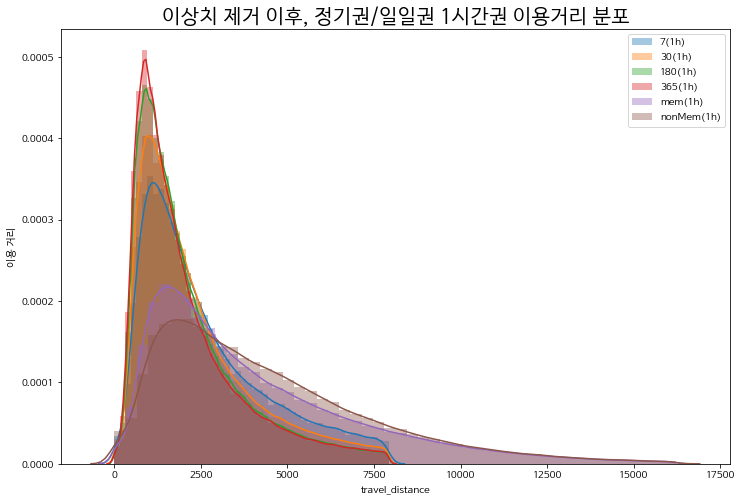

In [179]:
plt.figure(figsize=(12,8))
for i in range(len(reg_1h)):
    reg_fare=distance_remove_reg[distance_remove_reg['fare']==reg_1h[i]]
    sns.distplot(reg_fare['travel_distance'], label=reg_1h_ko[i])
    
for i in range(len(day_1h)):
    day_fare=distance_remove_day[distance_remove_day['fare']==day_1h[i]]
    sns.distplot(day_fare['travel_distance'], label=day_1h_ko[i])
    
plt.title('이상치 제거 이후, 정기권/일일권 1시간권 이용거리 분포', fontsize=20)
plt.ylabel('이용 거리')
plt.legend()
plt.show()

#### 정기권 2시간권 끼리 비교

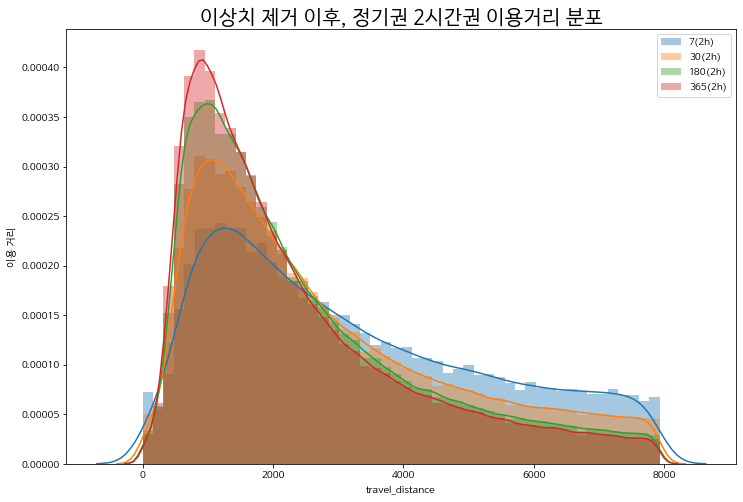

In [177]:
plt.figure(figsize=(12,8))
for i in range(len(reg_2h)):
    reg_fare=distance_remove_reg[distance_remove_reg['fare']==reg_2h[i]]
    sns.distplot(reg_fare['travel_distance'], label=reg_2h_ko[i])

plt.title('이상치 제거 이후, 정기권 2시간권 이용거리 분포', fontsize=20)
plt.ylabel('이용 거리')
plt.legend()
plt.show()

#### 일일권 2시간권 끼리 비교

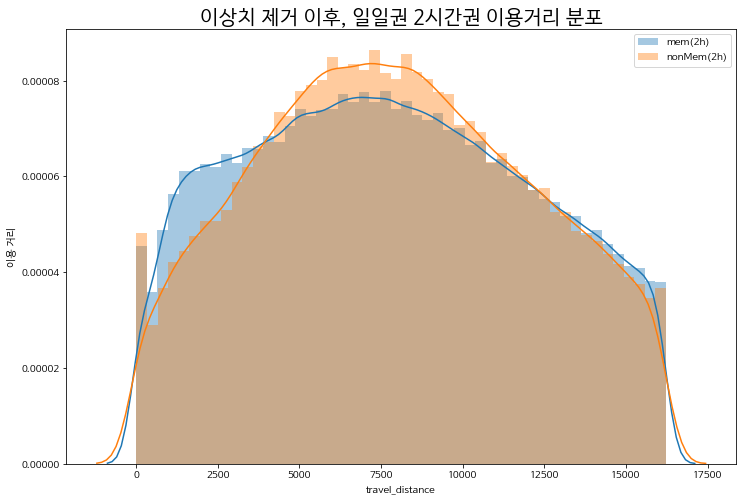

In [180]:
plt.figure(figsize=(12,8))
for i in range(len(day_2h)):
    day_fare=distance_remove_day[distance_remove_day['fare']==day_2h[i]]
    sns.distplot(day_fare['travel_distance'], label=day_2h_ko[i])
    
plt.title('이상치 제거 이후, 일일권 2시간권 이용거리 분포', fontsize=20)
plt.ylabel('이용 거리')
plt.legend()
plt.show()

#### 이상치 제거 이후, 정기권/일일권 2시간권 끼리의 이용거리 비교

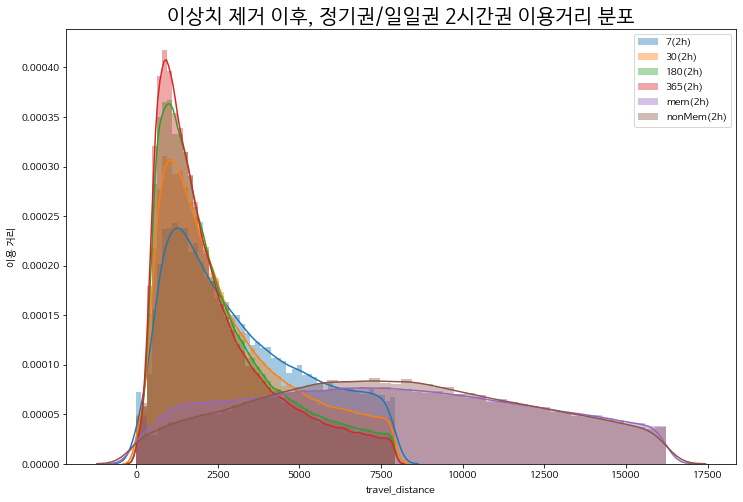

In [181]:
plt.figure(figsize=(12,8))
for i in range(len(reg_2h)):
    reg_fare=distance_remove_reg[distance_remove_reg['fare']==reg_2h[i]]
    sns.distplot(reg_fare['travel_distance'], label=reg_2h_ko[i])
    
for i in range(len(day_2h)):
    day_fare=distance_remove_day[distance_remove_day['fare']==day_2h[i]]
    sns.distplot(day_fare['travel_distance'], label=day_2h_ko[i])
    
plt.title('이상치 제거 이후, 정기권/일일권 2시간권 이용거리 분포', fontsize=20)
plt.ylabel('이용 거리')
plt.legend()
plt.show()